<h1>Telecom Churn Dataset</h1>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Importing the dataset
df = pd.read_csv('/content/sample_data/churn-bigml-80.csv')

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

We can see there are no null values in our dataset therefore we can proceed with univariate analysis.

<h1>Basic Visualization of Data</h1>

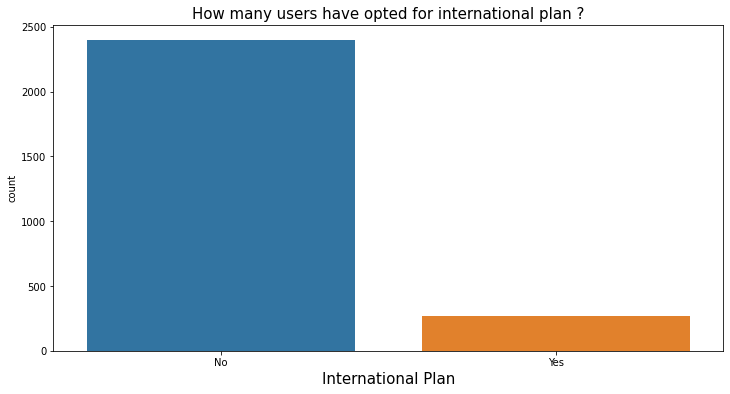

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='International plan')
plt.xlabel('International Plan',fontsize=15)
plt.title('How many users have opted for international plan ?',fontsize=15)
plt.show()

<b>Inference :</b>

We can clearly see that not many users opt for international plans.

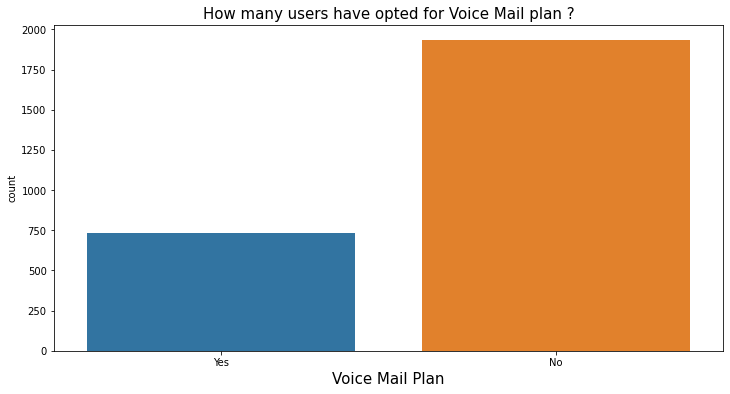

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Voice mail plan')
plt.xlabel('Voice Mail Plan',fontsize=15)
plt.title('How many users have opted for Voice Mail plan ?',fontsize=15)
plt.show()

<b>Inference : </b>

Not many users opt for voice mail plans.

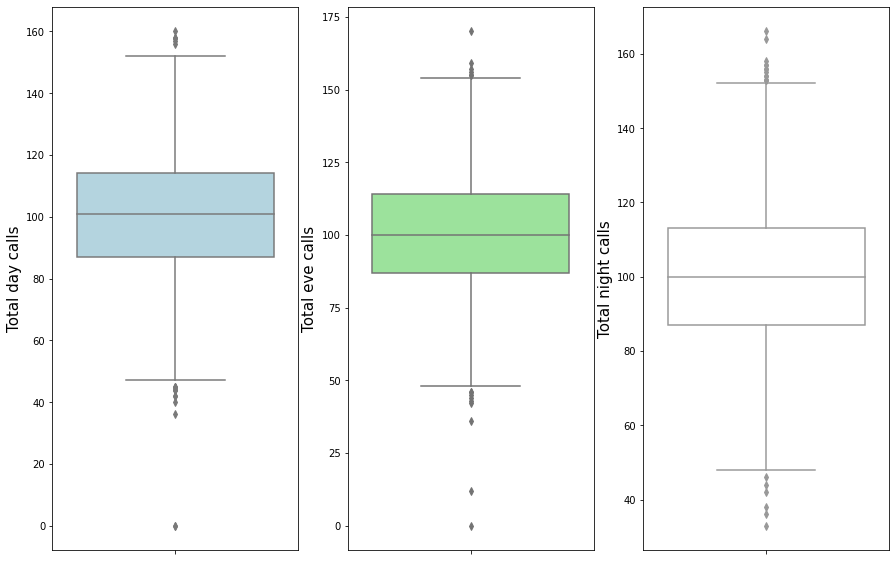

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.boxplot(data=df,y='Total day calls',color='lightblue')
plt.ylabel('Total day calls',fontsize=15)

plt.subplot(1,3,2)
sns.boxplot(data=df,y='Total eve calls',color='lightgreen')
plt.ylabel('Total eve calls',fontsize=15)

plt.subplot(1,3,3)
sns.boxplot(data=df,y='Total night calls',color='white')
plt.ylabel('Total night calls',fontsize=15)

plt.show()

<b>Inference : </b>

We can see that most of the calls are made in the morning with respect to that in evening and night where it is the lowest.

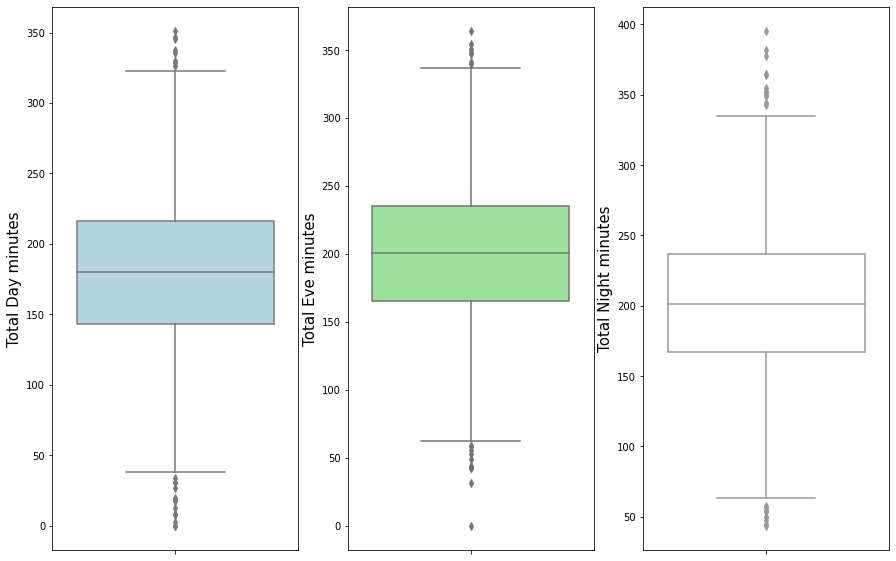

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.boxplot(data=df,y='Total day minutes',color='lightblue')
plt.ylabel('Total Day minutes',fontsize=15)

plt.subplot(1,3,2)
sns.boxplot(data=df,y='Total eve minutes',color='lightgreen')
plt.ylabel('Total Eve minutes',fontsize=15)

plt.subplot(1,3,3)
sns.boxplot(data=df,y='Total night minutes',color='white')
plt.ylabel('Total Night minutes',fontsize=15)

plt.show()

<b>Inference :</b>

We can see that despite having are more calls made during the day,user do not spend more time on calls in the morning.

User tends to talk for longer time in the afternoon than the others.

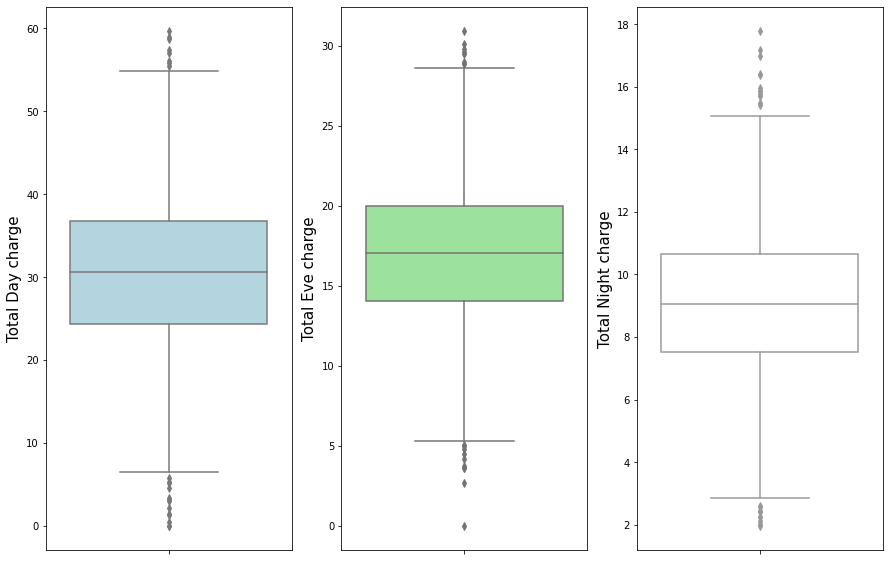

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.boxplot(data=df,y='Total day charge',color='lightblue')
plt.ylabel('Total Day charge',fontsize=15)

plt.subplot(1,3,2)
sns.boxplot(data=df,y='Total eve charge',color='lightgreen')
plt.ylabel('Total Eve charge',fontsize=15)

plt.subplot(1,3,3)
sns.boxplot(data=df,y='Total night charge',color='white')
plt.ylabel('Total Night charge',fontsize=15)

plt.show()

<b>Inference :</b>

The charges are maximum in the evening time and lowest in the night time as the calls tends to be longer.
These plots are in conjunction with the minutes spoken.

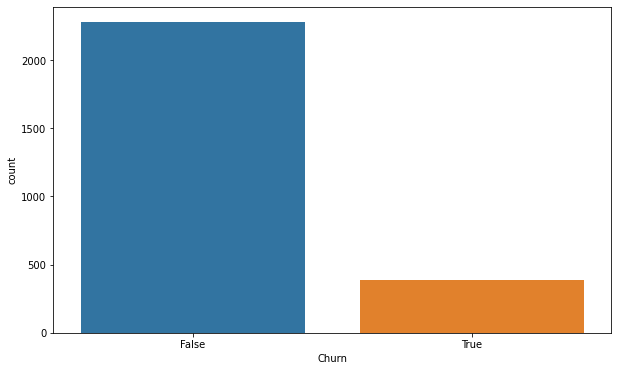

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Churn')
plt.show()

<b>Inference :</b>

Most people do not leave the service

In [ ]:
# Creating a new dataframe dftotal:
dftotal = pd.DataFrame(df['Churn'])

In [ ]:
#Creating three columns for total minutes, total calls and total charges
dftotal['Total minutes'] = df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes']
dftotal['Total calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls']
dftotal['Total charges'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge']

In [ ]:
dftotal.head()

,Churn,Total minutes,Total calls,Total charges
0,False,707.2,300,72.86
1,False,611.5,329,55.54
2,False,527.2,328,59.00
3,False,558.2,248,65.02
4,False,501.9,356,49.36


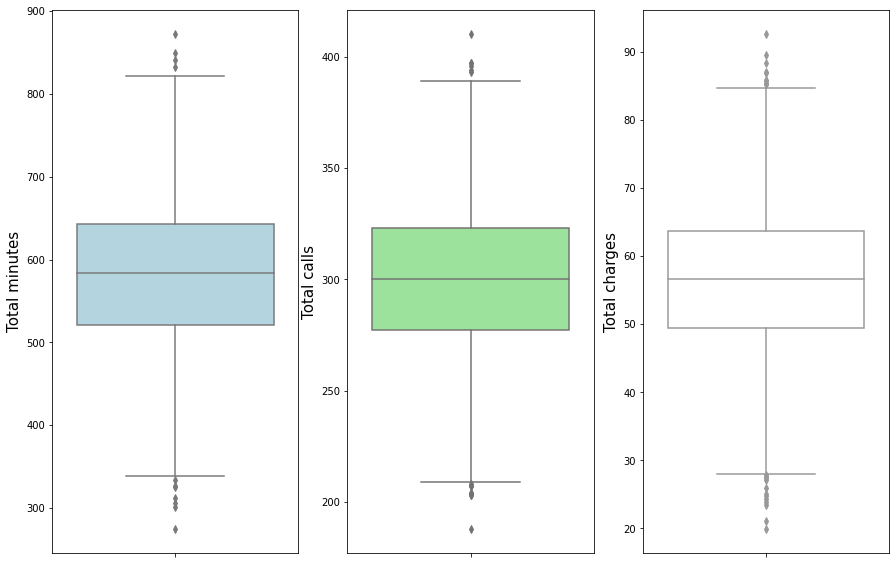

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.boxplot(data=dftotal,y='Total minutes',color='lightblue')
plt.ylabel('Total minutes',fontsize=15)

plt.subplot(1,3,2)
sns.boxplot(data=dftotal,y='Total calls',color='lightgreen')
plt.ylabel('Total calls',fontsize=15)

plt.subplot(1,3,3)
sns.boxplot(data=dftotal,y='Total charges',color='white')
plt.ylabel('Total charges',fontsize=15)

plt.show()

<b>Inference : </b>

Each attribute is consistent with each other suggesting normal pricing for calls made.

<h1>Bi-Variate Analysis</h1>

In [ ]:
# Building a heatmap to check correlation between each variable

corr = df.corr()

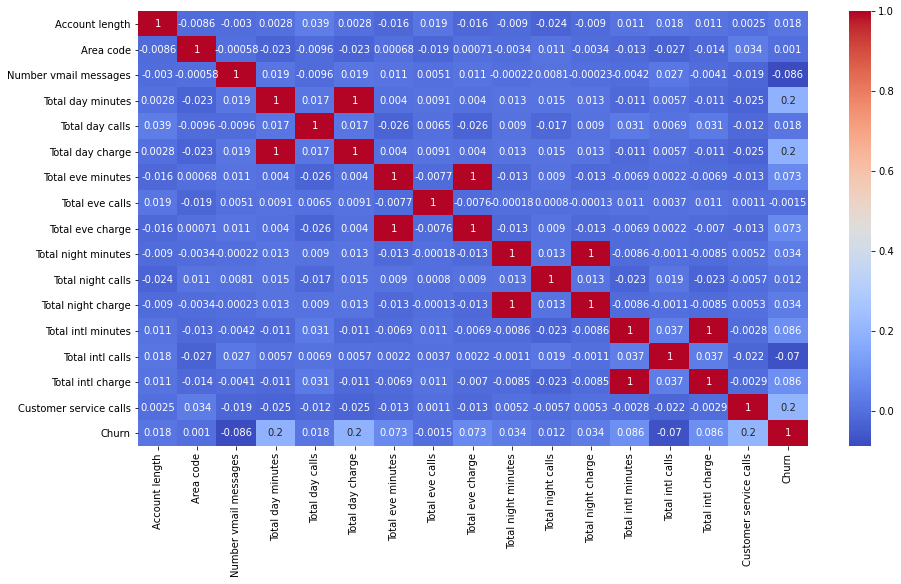

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data=corr,annot=True,cmap='coolwarm')
plt.show()

<h3>Observations : </h3>

<b>With regard to the heatmap we can see high correlation between the following variables:</b>

With respect to churn

*   Total day minutes to Churn at 0.2
*   Total day charge to Churn at 0.2
*   Customer service calls to Churn at 0.2

Other relations

*   Total day charge to Total day minutes at 1
*   Total evening charge to total eve minutes at 1
*   Total night charge to total night minutes at 1


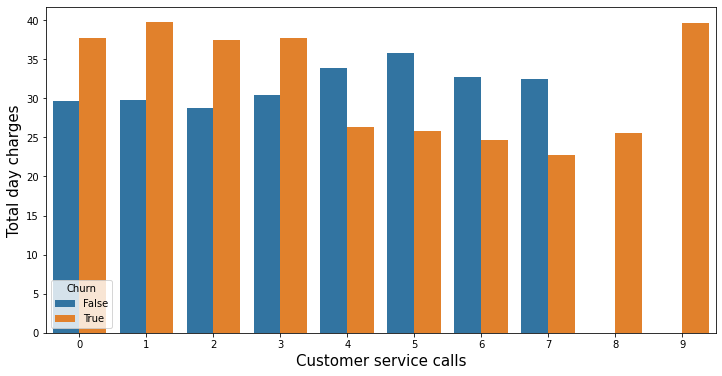

In [ ]:
# How does Total day minutes spoken relate to the Churn rate
plt.figure(figsize=(12,6))
sns.barplot(data = df, x = 'Customer service calls', y = 'Total day charge', hue = 'Churn', ci = False)
plt.xlabel('Customer service calls', fontsize = 15)
plt.ylabel('Total day charges', fontsize = 15)
plt.show()

<b>Inference :</b>

*   We can see that if customer service calls are made more than 7 times, then the service is bound to be cancelled. This also comes with high charges imposed on the user.
*   At the same time we can see that many users leave the service over 1 to 3 calls made to the customer service when are charged more. Analysis of the total day charge to the minutes spoken over churn rate could give us a better understanding of the same.



<Figure size 1080x432 with 0 Axes>

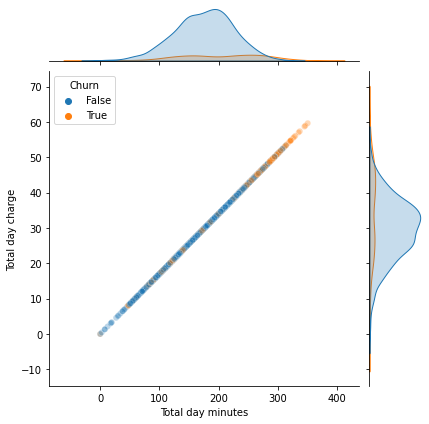

In [ ]:
plt.figure(figsize = (15,6))
sns.jointplot(data = df, x = 'Total day minutes', y = 'Total day charge',hue = 'Churn', alpha = 0.3)
plt.xlabel('Total Day Minutes', fontsize = 13)
plt.ylabel('Total Day Charges', fontsize = 13)
plt.show()

<b>Inference :</b>

*   A linear relationship can be observed between the two Variables.
*   Visible Churn can be seen with higher charges imposed when spoken for longer times.



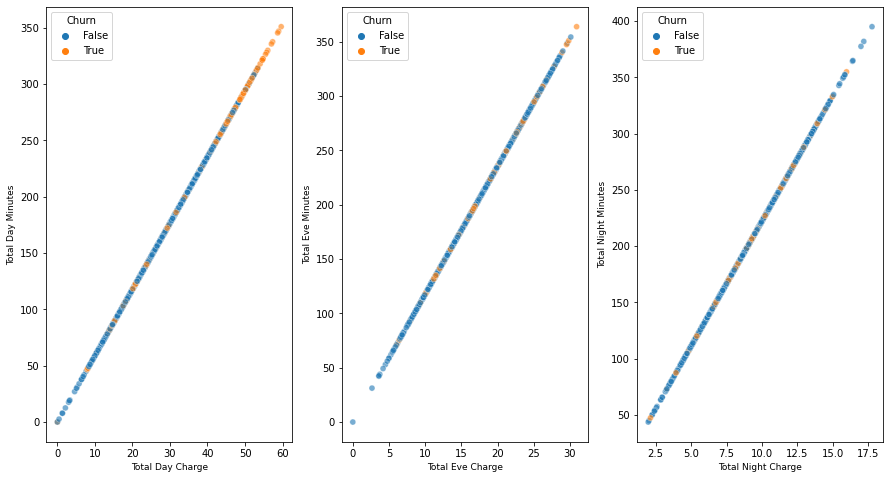

In [ ]:
plt.figure(figsize = (15,8))
plt.subplot(1,3,1)
sns.scatterplot(data = df, x = 'Total day charge', y = 'Total day minutes',hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Day Charge', fontsize = 9)
plt.ylabel('Total Day Minutes', fontsize = 9)

plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'Total eve charge', y = 'Total eve minutes',hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Eve Charge', fontsize = 9)
plt.ylabel('Total Eve Minutes', fontsize = 9)

plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'Total night charge', y = 'Total night minutes',hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Night Charge', fontsize = 9)
plt.ylabel('Total Night Minutes', fontsize = 9)

plt.show()

<b>Inference :</b>

*   We can observe from the three scatterplots that the churn rate is maximum times True in the Day.
*   In the evening and night we can see that the churn rate is not so relevant.



<h4>How do Users with international plan relate with the churn?</h4>

Text(14.145746527777781, 0.5, 'Count')

<Figure size 1080x576 with 0 Axes>

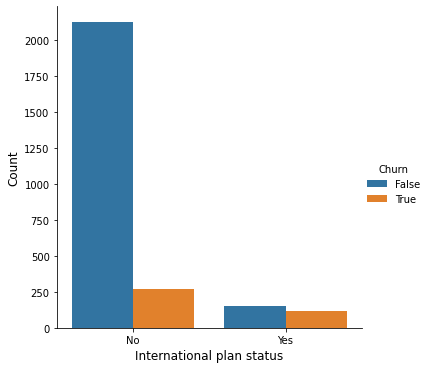

In [ ]:
plt.figure(figsize = (15,8))
sns.catplot(data = df, x ='International plan', hue = 'Churn',kind = 'count')
plt.xlabel('International plan status', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

<b>Inference :</b>

*   Users who have an international plan are relatively very less than those who do not.
*   We can also observe that people who have an international plan have almost equal churn rate.



<h2>Conclusion</h2>

*  Based on my observation I can see that most people who leave the service are the ones who use the service in the day/morning. 
*   It can also be observed that most people who use the service in the morning speak for shorter amounts of time but make more calls.
*   International plan users are more consistent with their churn w.r.t the ones who do not have the service.


<b>Prescription :</b>

*   Introducing plans which minimize costs for more number of calls can be used.
*   Decreasing the prices as the talk-time increases can be an effective way to reduce the churn.
*   Improvement in the customer service can be done to reduce the number of calls which cause the churn.




